# Detailed report summarizing

**Task Objective:**
Train a YOLOv8 model to detect and classify objects from two classes, "car_norm" and "car_top_view," using a custom dataset.



Creating a Custom Dataset:

To create a custom dataset for object detection, we follow these steps:

1. Combining Two Datasets:

  We combine two existing datasets into a single dataset.
  - Dataset 1 contains aerial view images of cars.
  - Dataset 2 contains side view images of cars.
The combined dataset will be saved under the name 'car-dataset-yolo.'

2. Balancing the Dataset:
  - We observe that the combined dataset may have class imbalance issues, where one class (e.g., "aerial view") has more data than the other class (e.g., "side view").
To address this imbalance, we create a new balanced dataset.

3. Creating a Balanced Dataset:

  To create a balanced dataset, we take the following steps:

  * Data Selection:

  We randomly select a fixed number of images from each class in the combined dataset.
  For example, we choose 250 images of "aerial view" and 250 images of "side view."
  
  * Splitting Data:

  We split the selected data into two subsets: training and testing.
  Typically, we use an 80-20 split, where 80% of the selected data goes into the training set, and 20% goes into the testing set.

By creating a balanced dataset, you ensure that your model has an equal representation of both classes during training, which can lead to better model performance in object detection tasks.








# **Approach:**

1. **Data Collection:**
   - we have a custom dataset with two classes: "car_norm" and "car_top_view."
   - Each class contains 120 images for a total of 240 images.

2. **Data Splitting:**
   - You split the dataset into a training set (80%) and a validation set (20%).
   - The split resulted in 192 images in the training set and 48 images in the validation set.

3. **Model Selection:**
   - we chose to use YOLOv8, a state-of-the-art object detection model provided by the Ultralytics library.

4. **Hyperparameters:**
   - we set the following hyperparameters:
     - `imgsz`: Image size of 1280x1280 pixels.
     - `epochs`: Number of training epochs set to 30.
     - `batch`: Batch size set to 8 images per batch.
     - `name`: Model name as 'yolov8n_v8_50e'.

5. **Training:**
   - we loaded the pre-trained YOLOv8 model from 'yolov8n.pt.'
   - we trained the model using the custom dataset and specified hyperparameters.
   - The model was trained for 30 epochs.

6. **Challenges:**
  - Model Selection: The YOLO model is not able to detect cars in all orientations. To improve this, we need to train it with our data.
  - Dataset: Finding an appropriate dataset for our problem.
  - Data Imbalance: The dataset has an imbalance between the two classes, "car_norm" and "car_top_view," so we need to

7. **Results:**
   - The model was trained for 30 epochs, and the training and validation results can be examined to assess the model's performance.



# Setup
+ Set Kaggle dataset API

In [1]:
!touch kaggle.json
!echo '{"username":"shadanparvez","key":""}'>> kaggle.json

+ creating connection

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print('connection done!')

connection done!


I created a custom dataset on kaggel having cars images
+ Download my custom data from kaggel to my portal
+ unzip it

In [ ]:
!kaggle datasets download -d shadanparvez/car-dataset-yolo
!unzip car-dataset-yolo.zip

+ save all data in a folder data

In [4]:
!mkdir data
import shutil
shutil.move('train', 'data')
shutil.move('test', 'data')

'data/test'

Balance my dataset
  + data [unbalances] -> dataset [Balanced dataset]

In [5]:

import os
import shutil
import random

# Define the paths to your original dataset and the destination folder for the new dataset
original_dataset_path =  '/content/data'
new_dataset_path = 'dataset'

# Ensure the destination folder exists
os.makedirs(new_dataset_path, exist_ok=True)

# Define the desired number of images per class
desired_images_per_class = 120

# Function to copy a specified number of images and labels from a source class folder to a destination class folder
def copy_images_and_labels(source_class_folder, destination_class_folder, num_images):
    images_folder = os.path.join(source_class_folder, 'images')
    labels_folder = os.path.join(source_class_folder, 'labels')

    # List all images in the class folder
    images = os.listdir(images_folder)

    # Randomly sample the specified number of images
    selected_images = random.sample(images, num_images)

    # Copy the selected images and their corresponding labels
    for image_name in selected_images:
        image_path = os.path.join(images_folder, image_name)
        label_path = os.path.join(labels_folder, image_name.replace('.jpg', '.txt'))

        # Copy image
        destination_image_path = os.path.join(destination_class_folder, 'images', image_name)
        shutil.copy(image_path, destination_image_path)

        # Copy label (if it exists)
        if os.path.exists(label_path):
            destination_label_path = os.path.join(destination_class_folder, 'labels', image_name.replace('.jpg', '.txt'))
            shutil.copy(label_path, destination_label_path)

# Iterate through each class and create a new dataset with 250 images for each class
classes = ['car_norm', 'car_top_view']

for class_name in classes:
    source_class_folder = os.path.join(original_dataset_path, 'train', class_name)
    destination_class_folder = os.path.join(new_dataset_path, class_name)

    os.makedirs(destination_class_folder, exist_ok=True)
    os.makedirs(os.path.join(destination_class_folder, 'images'), exist_ok=True)
    os.makedirs(os.path.join(destination_class_folder, 'labels'), exist_ok=True)

    copy_images_and_labels(source_class_folder, destination_class_folder, desired_images_per_class)

print("New dataset creation complete.")


New dataset creation complete.


+ Spliting data into train and test data

In [6]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the paths for the source data
source_root = 'dataset'
source_classes = ['car_norm', 'car_top_view']

# Set the paths for the destination train and validation data
dest_root = 'dataset_split'
train_val_ratio = 0.8

# Create the destination directories if they don't exist
for class_name in source_classes:
    for split_type in ['train', 'val']:
        os.makedirs(os.path.join(dest_root, split_type, class_name, 'images'), exist_ok=True)
        os.makedirs(os.path.join(dest_root, split_type, class_name, 'labels'), exist_ok=True)

# Iterate through each class
for class_name in source_classes:
    images_dir = os.path.join(source_root, class_name, 'images')
    labels_dir = os.path.join(source_root, class_name, 'labels')

    # List all image files in the class
    image_files = os.listdir(images_dir)

    # Split the data into train and validation sets
    train_files, val_files = train_test_split(image_files, train_size=train_val_ratio, random_state=42)

    # Copy images and labels to the appropriate destination
    for split_type, files in [('train', train_files), ('val', val_files)]:
        for file_name in files:
            source_image_path = os.path.join(images_dir, file_name)
            source_label_path = os.path.join(labels_dir, file_name.replace('.jpg', '.txt'))

            dest_image_path = os.path.join(dest_root, split_type, class_name, 'images', file_name)
            dest_label_path = os.path.join(dest_root, split_type, class_name, 'labels', file_name.replace('.jpg', '.txt'))

            shutil.copy(source_image_path, dest_image_path)
            shutil.copy(source_label_path, dest_label_path)

print("Dataset split into train and validation sets.")


Dataset split into train and validation sets.


# yaml file
+ Saving data configure in car_data.yaml

In [7]:
!rm car_data.yaml
# Use the touch command to create an empty file
!touch car_data.yaml

# Use the echo command to write the content to the file
!echo 'train: /content/dataset_split/train' >> car_data.yaml
!echo 'val: /content/dataset_split/val  # validation images' >> car_data.yaml
!echo ''>>  car_data.yaml
!echo 'nc: 2  # number of classes' >> car_data.yaml
!echo "names: ['car_norm','car_top_view']  # class names" >> car_data.yaml
print("file created...")

rm: cannot remove 'car_data.yaml': No such file or directory
file created...


In [8]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.0/618.0 kB 6.3 MB/s eta 0:00:00


# Model
+ Training a custom data

In [9]:
from ultralytics import YOLO
import torch

# Before allocating memory, try releasing GPU memory
torch.cuda.empty_cache()

model = YOLO('yolov8n.pt')
results = model.train(
    data='car_data.yaml',
    imgsz=1280,
    epochs=30,
    batch=8,
    name='yolov8n_v8_50e'
)


100%|██████████| 6.23M/6.23M [00:00<00:00, 69.9MB/s]
Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=car_data.yaml, epochs=30, patience=50, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v8_50e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

# Detect car from an image
+ function model_predict
    -  input image , model
    -  save result as image in 'content/save'

In [24]:
import torch
import cv2
import numpy as np  # Import NumPy


def model_predict(image, model):
  image_path='/content/input/'+image
  img = cv2.imread(image_path)
  results = model(image_path)   # predict
  lables=[]
  # Loop through the detected objects and print their information
  for r in results:
      for box in r.boxes:
          class_name = r.names[int(box.cls)]  # Get the class name
          confidence = float(box.conf)  # Get the confidence score
          xyxy = box.xyxy[0].cpu().numpy().astype(int)  # Convert to NumPy array and then to int
          print(f"Class: {class_name}, Confidence: {confidence:.2f}, Coordinates: {xyxy}")
          lables.append(class_name)
  # Draw bounding boxes on the image
  for r in results:
      for box in r.boxes:
          xyxy = box.xyxy[0].cpu().numpy().astype(int)  # Convert to NumPy array and then to int
          cv2.rectangle(img, (xyxy[0], xyxy[1]), (xyxy[2], xyxy[3]), (0, 255, 0), 2)
  # Save the annotated image
  cv2.imwrite("/content/save/"+image, img)
  return img


# Main

In [25]:

#--- fetch data from '/content/input'
directory_path = "/content/input"
image_list = [f for f in os.listdir(directory_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

#--- Detect car from image
for image in image_list:
  print('[INFO]: Detecting on ',image)
  model_predict(image, model)



image 1/1 /content/input/car8.jpg: 736x1280 11 car_norms, 13.5ms
Speed: 8.7ms preprocess, 13.5ms inference, 2.6ms postprocess per image at shape (1, 3, 736, 1280)

image 1/1 /content/input/car4.jpg: 800x1280 10 car_norms, 14.7ms
Speed: 6.3ms preprocess, 14.7ms inference, 2.3ms postprocess per image at shape (1, 3, 800, 1280)

image 1/1 /content/input/car13.jpg: 736x1280 2 car_norms, 12.9ms
Speed: 5.6ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


[INFO]: Detecting on  car8.jpg
Class: car_norm, Confidence: 0.95, Coordinates: [298  79 381 202]
Class: car_norm, Confidence: 0.95, Coordinates: [439  77 528 199]
Class: car_norm, Confidence: 0.94, Coordinates: [ 60  81 158 205]
Class: car_norm, Confidence: 0.94, Coordinates: [283 219 381 355]
Class: car_norm, Confidence: 0.94, Coordinates: [223  79 304 202]
Class: car_norm, Confidence: 0.94, Coordinates: [ 44 224 136 342]
Class: car_norm, Confidence: 0.93, Coordinates: [434 211 526 341]
Class: car_norm, Confidence: 0.93, Coordinates: [145  84 226 203]
Class: car_norm, Confidence: 0.93, Coordinates: [360 216 448 343]
Class: car_norm, Confidence: 0.92, Coordinates: [504 211 603 337]
Class: car_norm, Confidence: 0.91, Coordinates: [130 222 218 339]
[INFO]: Detecting on  car4.jpg
Class: car_norm, Confidence: 0.91, Coordinates: [300 148 367 182]
Class: car_norm, Confidence: 0.89, Coordinates: [393 181 480 237]
Class: car_norm, Confidence: 0.84, Coordinates: [ 86 183 183 238]
Class: car_nor


image 1/1 /content/input/car7.jpg: 736x1280 4 car_norms, 12.3ms
Speed: 5.4ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)

image 1/1 /content/input/car10.jpg: 608x1280 3 car_norms, 11.8ms
Speed: 4.1ms preprocess, 11.8ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 1280)

image 1/1 /content/input/car1.jpg: 800x1280 9 car_norms, 18.4ms
Speed: 6.1ms preprocess, 18.4ms inference, 2.7ms postprocess per image at shape (1, 3, 800, 1280)


[INFO]: Detecting on  car7.jpg
Class: car_norm, Confidence: 0.94, Coordinates: [ 620   65 1185  312]
Class: car_norm, Confidence: 0.92, Coordinates: [ 614  340 1114  615]
Class: car_norm, Confidence: 0.72, Coordinates: [ 74  66 659 320]
Class: car_norm, Confidence: 0.71, Coordinates: [  5 352 661 625]
[INFO]: Detecting on  car10.jpg
Class: car_norm, Confidence: 0.51, Coordinates: [  0  46 269 291]
Class: car_norm, Confidence: 0.36, Coordinates: [  0  46 183 292]
Class: car_norm, Confidence: 0.26, Coordinates: [153  64 475 300]
[INFO]: Detecting on  car1.jpg



image 1/1 /content/input/car12.jpg: 928x1280 10 car_norms, 15.8ms
Speed: 6.4ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shape (1, 3, 928, 1280)


Class: car_norm, Confidence: 0.92, Coordinates: [ 983  337 1300  557]
Class: car_norm, Confidence: 0.91, Coordinates: [447 448 898 753]
Class: car_norm, Confidence: 0.91, Coordinates: [139 380 425 626]
Class: car_norm, Confidence: 0.87, Coordinates: [232 281 485 372]
Class: car_norm, Confidence: 0.85, Coordinates: [538 286 790 420]
Class: car_norm, Confidence: 0.83, Coordinates: [ 790  264 1007  364]
Class: car_norm, Confidence: 0.82, Coordinates: [488 219 644 272]
Class: car_norm, Confidence: 0.82, Coordinates: [1031  233 1222  314]
Class: car_norm, Confidence: 0.69, Coordinates: [728 204 913 265]
[INFO]: Detecting on  car12.jpg
Class: car_norm, Confidence: 0.90, Coordinates: [309 231 515 334]
Class: car_norm, Confidence: 0.87, Coordinates: [  8 169 194 352]
Class: car_norm, Confidence: 0.86, Coordinates: [331 468 493 570]
Class: car_norm, Confidence: 0.86, Coordinates: [510  71 695 253]
Class: car_norm, Confidence: 0.84, Coordinates: [210 363 402 553]
Class: car_norm, Confidence: 0.8


image 1/1 /content/input/car2.jpg: 800x1280 7 car_norms, 14.4ms
Speed: 8.2ms preprocess, 14.4ms inference, 2.8ms postprocess per image at shape (1, 3, 800, 1280)



Class: car_norm, Confidence: 0.94, Coordinates: [ 505 1078 1256 1544]
Class: car_norm, Confidence: 0.91, Coordinates: [2217 1020 3139 1478]
Class: car_norm, Confidence: 0.88, Coordinates: [1398 1032 2043 1672]
Class: car_norm, Confidence: 0.81, Coordinates: [1099  832 1609 1073]
Class: car_norm, Confidence: 0.71, Coordinates: [1941  823 2415 1060]
Class: car_norm, Confidence: 0.62, Coordinates: [ 373  814  959 1041]
Class: car_norm, Confidence: 0.26, Coordinates: [2479  871 3113 1020]
[INFO]: Detecting on  car6.jpg


image 1/1 /content/input/car6.jpg: 1280x1280 2 car_norms, 20.3ms
Speed: 10.6ms preprocess, 20.3ms inference, 7.2ms postprocess per image at shape (1, 3, 1280, 1280)

image 1/1 /content/input/car9.jpg: 928x1280 10 car_norms, 15.4ms
Speed: 5.7ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 928, 1280)



Class: car_norm, Confidence: 0.85, Coordinates: [271 249 468 331]
Class: car_norm, Confidence: 0.79, Coordinates: [ 28 246 246 340]
[INFO]: Detecting on  car9.jpg
Class: car_norm, Confidence: 0.89, Coordinates: [193 145 322 209]
Class: car_norm, Confidence: 0.87, Coordinates: [  5 106 121 220]
Class: car_norm, Confidence: 0.87, Coordinates: [132 226 251 346]
Class: car_norm, Confidence: 0.85, Coordinates: [318  44 436 158]
Class: car_norm, Confidence: 0.84, Coordinates: [207 293 309 356]
Class: car_norm, Confidence: 0.80, Coordinates: [381 102 499 220]
Class: car_norm, Confidence: 0.77, Coordinates: [  0  35  62 159]
Class: car_norm, Confidence: 0.73, Coordinates: [254   0 371 100]
Class: car_norm, Confidence: 0.45, Coordinates: [439 182 500 284]
Class: car_norm, Confidence: 0.32, Coordinates: [193   0 279  36]
[INFO]: Detecting on  car14.jpg


image 1/1 /content/input/car14.jpg: 736x1280 34 car_norms, 12.9ms
Speed: 5.2ms preprocess, 12.9ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)

image 1/1 /content/input/car3.jpg: 864x1280 39 car_norms, 14.8ms
Speed: 5.9ms preprocess, 14.8ms inference, 1.7ms postprocess per image at shape (1, 3, 864, 1280)


Class: car_norm, Confidence: 0.97, Coordinates: [ 540  764  744 1080]
Class: car_norm, Confidence: 0.96, Coordinates: [ 761  771  974 1081]
Class: car_norm, Confidence: 0.96, Coordinates: [   0 1133  116 1440]
Class: car_norm, Confidence: 0.95, Coordinates: [   0  708  124 1030]
Class: car_norm, Confidence: 0.95, Coordinates: [1359  752 1558 1068]
Class: car_norm, Confidence: 0.94, Coordinates: [ 929  793 1159 1113]
Class: car_norm, Confidence: 0.94, Coordinates: [ 355 1127  505 1440]
Class: car_norm, Confidence: 0.93, Coordinates: [ 308  773  503 1089]
Class: car_norm, Confidence: 0.93, Coordinates: [ 107  724  328 1054]
Class: car_norm, Confidence: 0.93, Coordinates: [2060  747 2221 1089]
Class: car_norm, Confidence: 0.93, Coordinates: [1514 1120 1666 1437]
Class: car_norm, Confidence: 0.93, Coordinates: [1311 1126 1459 1440]
Class: car_norm, Confidence: 0.92, Coordinates: [ 147 1130  306 1440]
Class: car_norm, Confidence: 0.92, Coordinates: [ 552 1140  705 1438]
Class: car_norm, Con

# Display Result
+ veiw detected images from  save

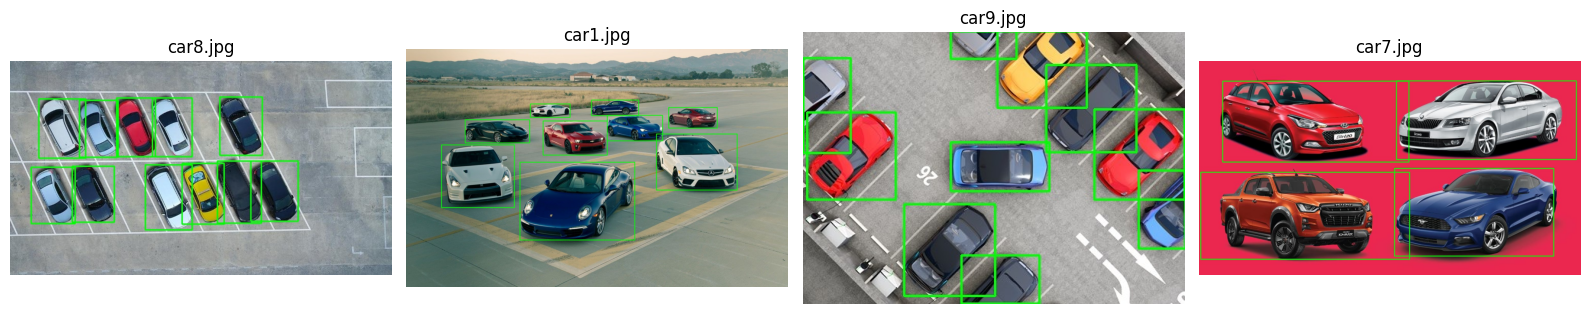

In [34]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the folder containing images
folder_path = '/content/save'  # Replace with your folder path

# Get a list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
# Create a new figure to display the images
fig, axs = plt.subplots(1, 4, figsize=(16, 4))  # Create a 1x4 grid of subplots

# Loop through the first four image files and display them horizontally
for i, image_file in enumerate(image_files[:4]):
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)

    # Load and display the image using Matplotlib in the corresponding subplot
    img = mpimg.imread(image_path)
    axs[i].imshow(img)
    axs[i].set_title(image_file)
    axs[i].axis('off')  # Turn off axis labels

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


+ Test on all images

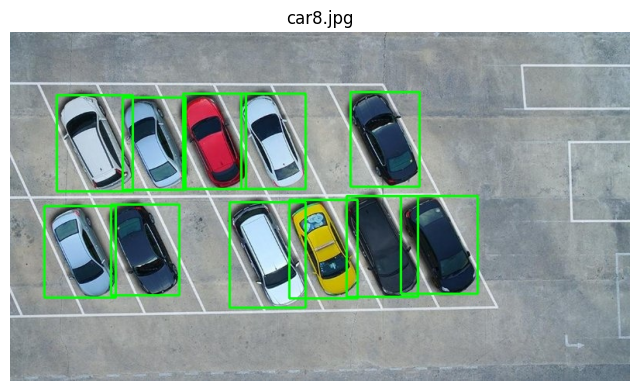

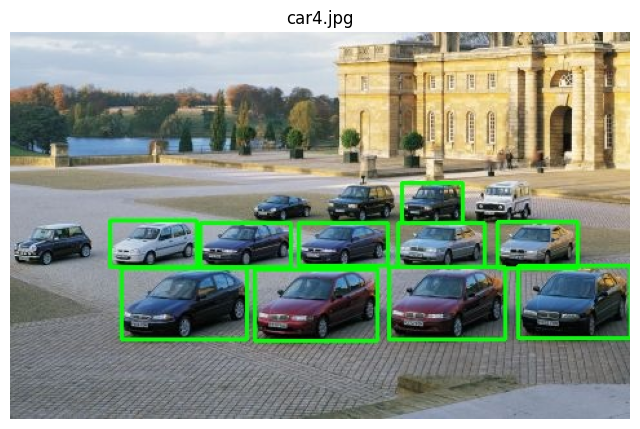

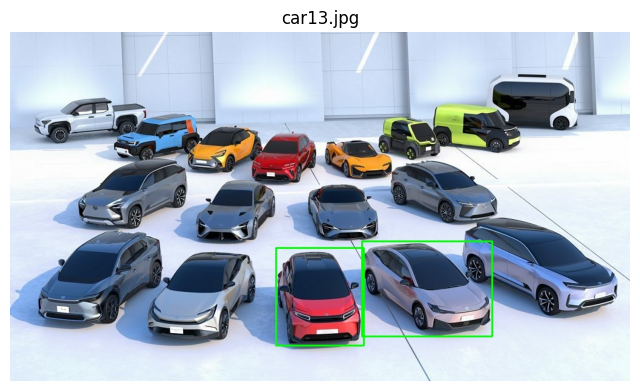

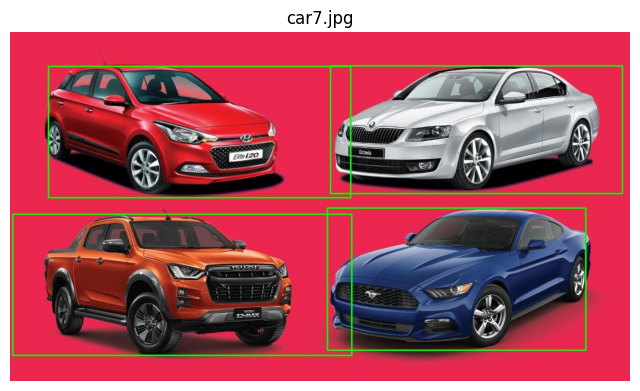

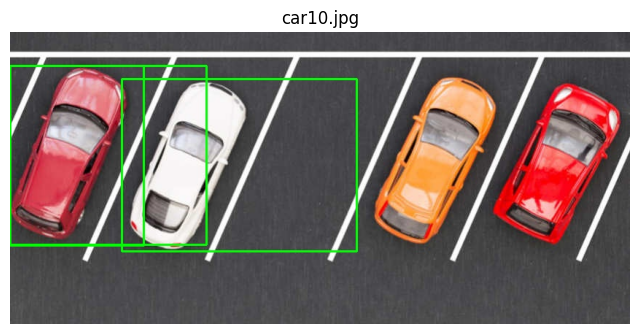

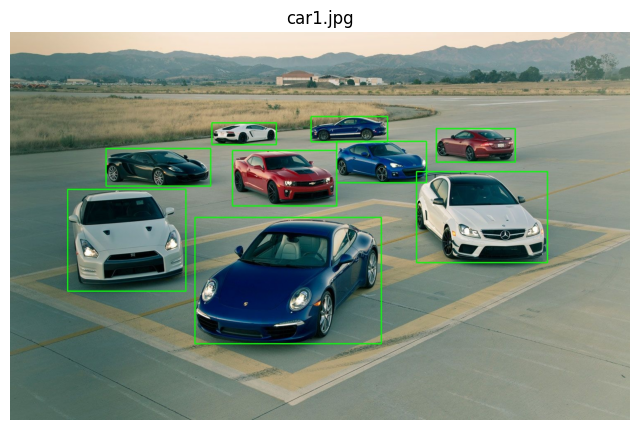

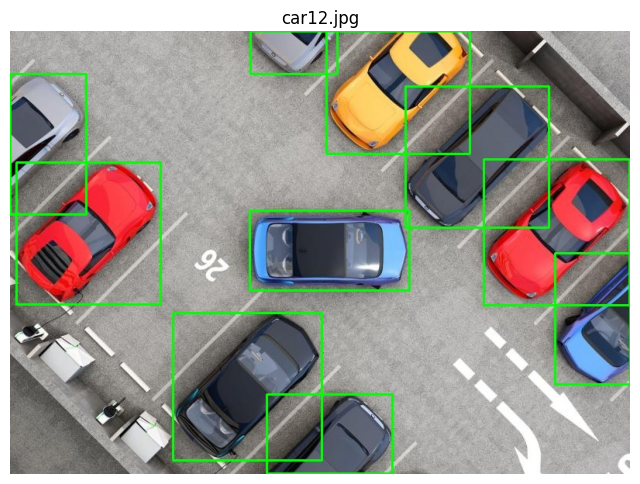

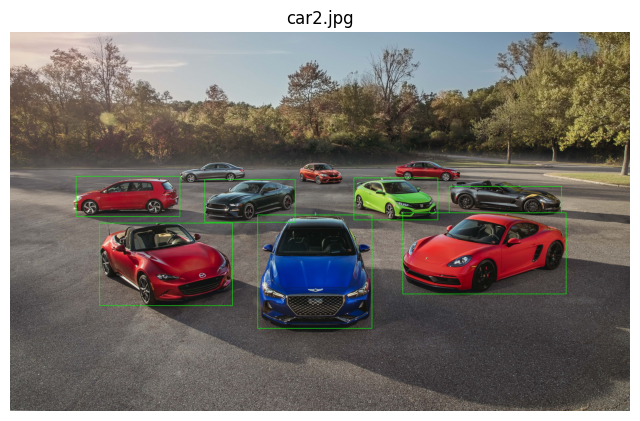

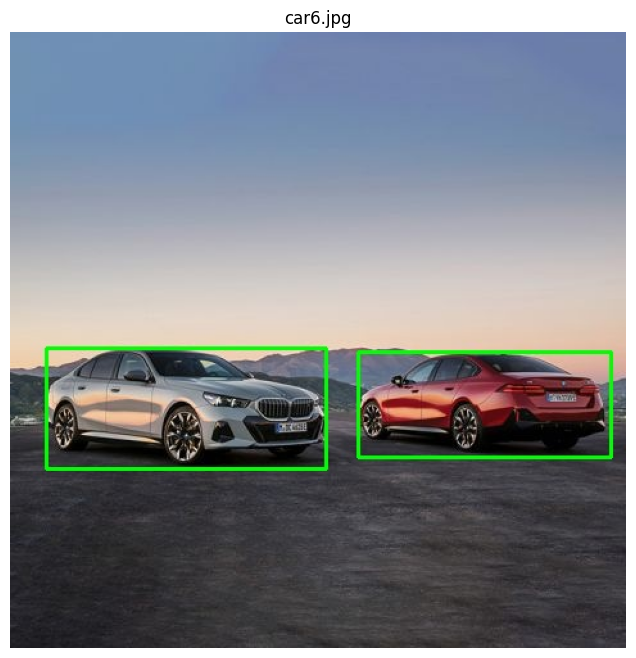

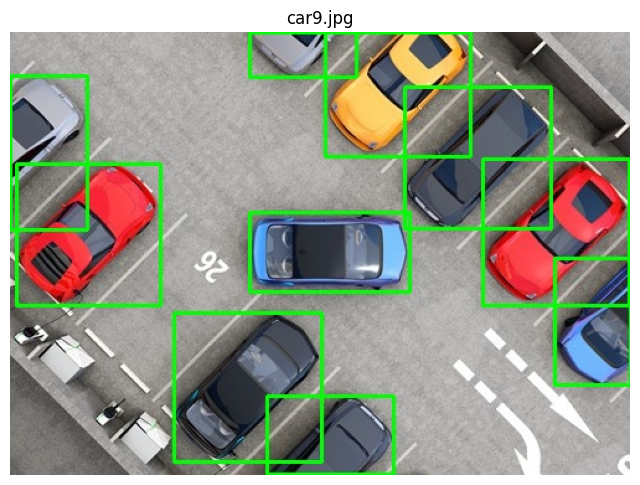

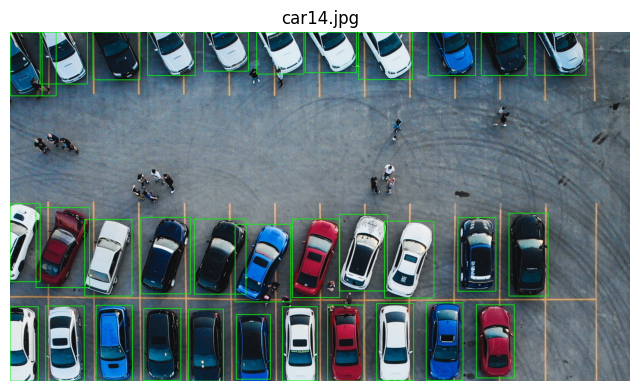

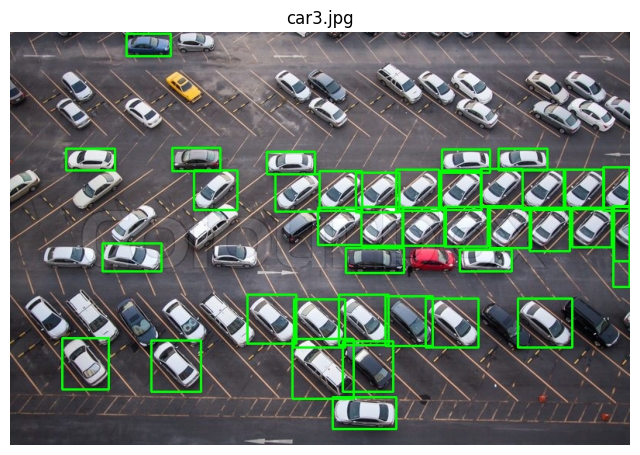

In [35]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the folder containing images
folder_path = '/content/save'  # Replace with your folder path

# Get a list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Loop through the image files and display them using Matplotlib
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)

    # Load and display the image using Matplotlib
    img = mpimg.imread(image_path)
    plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# zip data for download

In [36]:
folder_to_zip = '/content/runs'

# Define the name for the zip file
zip_file_name = 'run.zip'

# Create a zip archive of the folder
shutil.make_archive(zip_file_name, 'zip', folder_to_zip)

'/content/run.zip.zip'